Function definition (to be removed, just 1 in the all code)

In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import json
from shapely import wkt
import ipywidgets as widgets
import matplotlib.pyplot as plt
import folium
from shapely.geometry import mapping

def read_response(t):
    try:
        data = t.json() #This will convert the response to a json object
        return data
    except requests.exceptions.JSONDecodeError:
        print("Invalid response JSON!")
        print("Response content::", t.text)
        data = None 

def get_measurement_unit(pollutant):
    t=requests.post(url="http://127.0.0.1:5000/api/units", json={"var_pollutant": pollutant}) #json= data will convert the dictionary to a json object and send it to the server
    data = read_response(t) 
    return data[0]
    

## DV_10



In [3]:
t=requests.get(url="http://127.0.0.1:5000/api/pollutant")
list_pollutant = read_response(t)
Selected_pollutant = widgets.Dropdown(
    options=list_pollutant,
    value=list_pollutant[0],
    default=list_pollutant[0],
    description='Pollutant:',
    disabled=False, #Because we want the user to be able to select the province
)
Selected_pollutant

Dropdown(description='Pollutant:', options=('Particolato Totale Sospeso', 'PM10 (SM2005)', 'Cadmio', 'Arsenico…

In [4]:
# select the data we want as parameters
data = {"var_pollutant": Selected_pollutant.value } #data is a dictionary

# send the request to the server, we use post because we are sending data to the server
t=requests.post(url="http://127.0.0.1:5000/api/DV_10", json=data) #json= data will convert the dictionary to a json object and send it to the server

data = read_response(t)


Adjustments to the geodataframe

In [10]:
# to visualize the response, we can conver the data to a pandas geodataframe
gdf = gpd.GeoDataFrame(data)
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf.set_geometry('geometry', inplace=True)

gdf['month'] = pd.to_datetime(gdf['month'], errors='coerce')
gdf['month'] = gdf['month'].dt.strftime('%b %Y')

print(gdf['month'].dtype)

# Convertire il formato per mostrare solo mese e anno
#df['mese_anno'] = df['month'].dt.strftime('%Y-%m')

print(gdf)

object
                      geometry     month  monthly_average  \
0    POINT (10.21121 45.54265)  Jan 2025        41.800000   
1     POINT (8.84733 45.54852)  Jan 2025        31.200000   
2     POINT (8.90419 45.10277)  Dec 2024        35.652381   
3     POINT (9.48528 45.30602)  Jan 2025        52.300000   
4      POINT (9.39558 45.8502)  Dec 2024        32.322109   
..                         ...       ...              ...   
163    POINT (9.16698 45.5476)  Jan 2025        72.700000   
164   POINT (9.59202 45.51934)  Dec 2024        40.272109   
165   POINT (9.59202 45.51934)  Jan 2025        51.100000   
166   POINT (9.23611 45.53477)  Jan 2025        94.000000   
167   POINT (9.35166 45.84221)  Dec 2024        24.882313   

                             nome_stazione  quota  
0                      Brescia v.Tartaglia  151.0  
1                   Arconate v. De Gasperi  182.0  
2       Sannazzaro de' Burgondi v.Traversi   85.0  
3                           Lodi v.Vignati   80.0  


In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.widgets import Cursor
from matplotlib.widgets import Slider
from matplotlib.widgets import RadioButtons

In [ ]:
# Creazione del plot con contour lines
#.contour(gdf['geometry'],gdf['quota'], levels=10, cmap='viridis')  # Contour lines
#plt.colorbar(label="Quota")

#plt.show()

## DV_11

In [14]:
t=requests.get(url="http://127.0.0.1:5000/api/pollutant")
list_pollutant = read_response(t)
Selected_pollutant = widgets.Dropdown(
    options=list_pollutant,
    value=list_pollutant[0],
    default=list_pollutant[0],
    description='Pollutant:',
    disabled=False, #Because we want the user to be able to select the province
)
Selected_pollutant

Dropdown(description='Pollutant:', options=('Particolato Totale Sospeso', 'PM10 (SM2005)', 'Cadmio', 'Arsenico…

In [15]:
# select the data we want as parameters
data = {"var_pollutant": Selected_pollutant.value } #data is a dictionary

# send the request to the server, we use post because we are sending data to the server
t=requests.post(url="http://127.0.0.1:5000/api/DV_10", json=data) #json= data will convert the dictionary to a json object and send it to the server

data = read_response(t)

In [17]:
# to visualize the response, we can conver the data to a pandas dataframe
df = gpd.GeoDataFrame(data)

df['month'] = pd.to_datetime(df['month'], errors='coerce')
df['month'] = df['month'].dt.strftime('%b %Y')

print(df['month'].dtype)

# Convertire il formato per mostrare solo mese e anno
#df['mese_anno'] = df['month'].dt.strftime('%Y-%m')

print(gdf)

object
                      geometry     month  monthly_average  \
0    POINT (10.21121 45.54265)  Jan 2025        41.800000   
1     POINT (8.84733 45.54852)  Jan 2025        31.200000   
2     POINT (8.90419 45.10277)  Dec 2024        35.652381   
3     POINT (9.48528 45.30602)  Jan 2025        52.300000   
4      POINT (9.39558 45.8502)  Dec 2024        32.322109   
..                         ...       ...              ...   
163    POINT (9.16698 45.5476)  Jan 2025        72.700000   
164   POINT (9.59202 45.51934)  Dec 2024        40.272109   
165   POINT (9.59202 45.51934)  Jan 2025        51.100000   
166   POINT (9.23611 45.53477)  Jan 2025        94.000000   
167   POINT (9.35166 45.84221)  Dec 2024        24.882313   

                             nome_stazione  quota  
0                      Brescia v.Tartaglia  151.0  
1                   Arconate v. De Gasperi  182.0  
2       Sannazzaro de' Burgondi v.Traversi   85.0  
3                           Lodi v.Vignati   80.0  


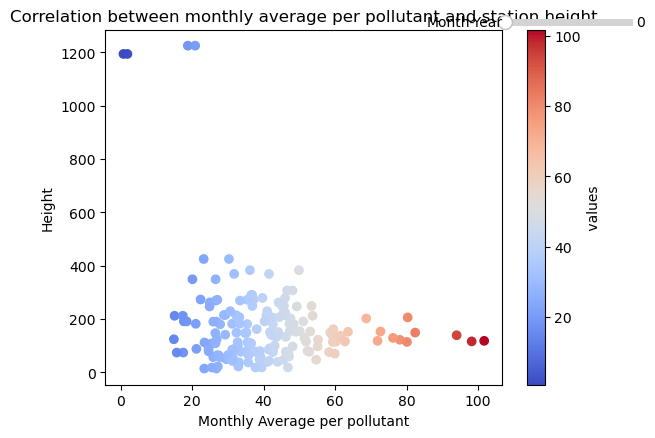

In [ ]:
#plt.plot(df['monthly_average'],df['quota'],'o')
# Creazione del plot
fig, ax = plt.subplots()
plt.subplots_adjust(top=0.85)  # Aggiunge spazio in alto 
# CAN BE ADDED A BOTTON FOR YEAR SELECTION

plt.scatter(df['monthly_average'], df['quota'], c=df['monthly_average'], cmap='coolwarm', marker='o')

# Aggiungere una barra dei colori
plt.colorbar(label=" values ")

# Labels and title
plt.title("Correlation between monthly average per pollutant and station height")
plt.xlabel("Monthly Average per pollutant")
plt.ylabel("Height")

#* Lista dei mesi
mesi = df['month']
mesi_dict = {i: mesi[i] for i in range(len(mesi))}  # Mappa numeri → mesi

# Slider con valori discreti
ax_slider = plt.axes([0.75, 0.85, 0.2, 0.03])
slider = Slider(ax_slider, 'Month-Year', 0, len(mesi)-1, valstep=1)

# Funzione di aggiornamento
def update(val):
    selected_month = mesi_dict[int(val)]
    print(f"Mese selezionato: {selected_month}")
    # Aggiorna il valore del grafico
    fig.canvas.draw_idle()  # Rende il widget interattivo
slider.on_changed(update)

 
plt.show()